# Cost Function for Logistic Regression in Classification

This notebook examines the implementation and use of the cost function for logistic regression algorithm, in the context of classification models. It does so by building on previous notebooks (1,2 and 3.)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import importlib

# Custom scripts imports
# Adding the directory to sys.path
sys.path.insert(0, os.path.abspath('../'))

# Import the modules after
from src.visualization import visualize
from src.models import predict_model

# Now reload using the module reference, for future changes.
importlib.reload(visualize)
importlib.reload(predict_model)

from src.visualization.visualize import plot_data
from src.models.predict_model import sigmoid

A simple dataset, as with previous examples, can be used for illustrative purposes:

In [18]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

This data is then plotted using red crosses as for y=1, and blue dots for y=0; or targets with said values:

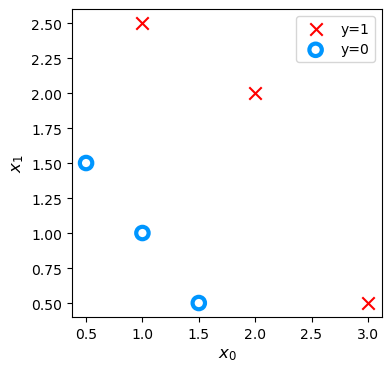

In [19]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
plot_data(X_train, y_train, ax)
# Set axes to extend from 0 to 4 in the plot
ax.axis = ([0,4,0,3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

## Cost Function

Before the **Loss Function** was defined, which applies to a single example from a training dataset. However, just as with Linear Regression, the combination of all the "losses" pero example is what the cost function focuses on:

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$



The algorithm for the cost function loops over all the examples and accumulates the total cost:

In [20]:
def compute_cost_logistic_regression(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        # z(i) component is the multilinear prediction for a given row and w chosen, plus the bias
        z_i = np.dot(X[i], w) + b
        # f_wb_i is plugging this then into the sigmoid
        f_wb_i = sigmoid(z_i)
        # The loss is applied as the loss function per example in the dataset
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    cost /= m
    return cost


This implementation can be test by using some arbitrarily chosen parameters (w and bias):

In [21]:
w_1 = np.array([1, 1])
b_1 = -3
print(compute_cost_logistic_regression(X_train, y_train, w_1, b_1))

0.36686678640551745


The cost calculated might not be optimal, yet, as iterations are needed to refine the parameters, but it is not as high. 

We can try with different parameters though, to observe how it impacts the decision boundary and fits the model, if the cost is even higher.

Fo example: `b = -4, w = np.array([1,1])`

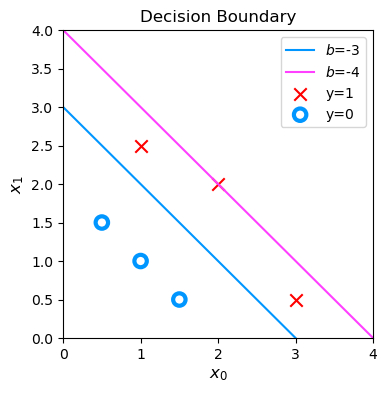

In [22]:
# Set of values in 0-6 range
x0 = np.arange(0,6)
# Plot the previous decision boundaries and the one with a bias of 4
x1 = 3 - x0
x1_second = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c="#0096ff", label="$b$=-3")
ax.plot(x0,x1_second, c="#FF40FF", label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data
plot_data(X_train,y_train,ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

Above plot shows how, for a bias of -4, the decision boundary for its related model misses the mark and might classify input values incorrectly. We can finally obtain the cost for the dataset using this model:

In [23]:
# 'w' params for first model
w_array1 = np.array([1,1])
# bias param for first model
b_1 = -3

# 'w' params for second model
w_array2 = np.array([1,1])
# bias param for second model
b_2 = -4
# Run cost using both models, print results
print("Cost for model with b = -3: ", compute_cost_logistic_regression(X_train, y_train, w_array1, b_1))
print("Cost for model with b = -3: ", compute_cost_logistic_regression(X_train, y_train, w_array2, b_2))

Cost for model with b = -3:  0.36686678640551745
Cost for model with b = -3:  0.5036808636748461


Clearly, the second model uses parameters that produce a higher cost, which matches the plot from above.